In [4]:
!pwd
!ls

/d/GH/GitWorkSpace/bank_model_competiton/data/v1
eda.ipynb
loan_balance.csv
train_concat_tx_time.csv
train_format.csv
train_time.csv


In [241]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
import datetime
import seaborn as sns
import time
import datetime
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', 100)

root_dir='../'

df0 = pd.read_csv('../../train/train.csv')
print('process time : ',time.strftime( '%Y-%m-%d %H:%M:%S', time.localtime()))

process time :  2025-08-31 15:30:06


# 数据探查

In [312]:
print(df.columns.values)
df.head()

['id' 'title' 'career' 'zip_code' 'residence' 'loan' 'term'
 'interest_rate' 'issue_time' 'syndicated' 'installment' 'record_time'
 'history_time' 'total_accounts' 'balance_accounts' 'balance_limit'
 'balance' 'level' 'label']


,id,title,career,zip_code,residence,loan,term,interest_rate,issue_time,syndicated,installment,record_time,history_time,total_accounts,balance_accounts,balance_limit,balance,level,label
0,0,9,0.0,221373,1,7200,36,10.95,1238631967,0,1,1238630622,472006661,17.0,9.0,36200.0,13856.0,A4,0
1,1,8,10.0,311681,0,21300,36,12.95,1128212052,0,0,1161907665,763779041,17.0,9.0,20400.0,13773.0,B0,1
2,2,8,7.0,271562,1,10400,60,21.05,1249171509,0,0,1383958593,727143443,17.0,9.0,10800.0,2023.0,B4,0
3,3,7,2.0,522083,0,33050,36,16.40,1172882234,0,1,1214353935,687660346,17.0,9.0,24700.0,21992.0,B3,0
4,4,8,3.0,101026,1,5200,36,14.35,1172882384,0,0,1240274527,322012875,17.0,9.0,5100.0,1669.0,B2,1


In [311]:
df.isna().sum()

id                        0
title                     0
career                 2608
zip_code                  0
residence                 0
loan                      0
term                      0
interest_rate             0
issue_time                0
syndicated                0
installment               0
record_time               0
history_time              0
total_accounts            0
balance_accounts          0
balance_limit           130
balance                   0
level                     0
label                     0
issue_time_format         0
record_time_format        0
history_time_format       0
record_time_dt            0
dtype: int64

In [173]:
df['issue_time_format'] = df['issue_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['record_time_format'] = df['record_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['history_time_format'] = df['history_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df.to_csv('train_format.csv', mode='w')

In [111]:
print('record  > issuce :', df[ df['record_time'] > df['issue_time']].shape)
print('record  < issuce :', df[ df['record_time'] < df['issue_time']].shape)
print('record  == issuce :', df[ df['record_time'] == df['issue_time']].shape)
print('record  > history :', df[ df['record_time'] > df['history_time']].shape)
print('record  < history :', df[ df['record_time'] < df['history_time']].shape)
print('record  == history :', df[ df['record_time'] == df['history_time']].shape)
print(df.shape)

record  > issuce : (23729, 22)
record  < issuce : (29729, 22)
record  == issuce : (22, 22)
record  > history : (53480, 22)
record  < history : (0, 22)
record  == history : (0, 22)
(53480, 22)


In [242]:
col_name = 'record_time'
df_stat = df[['record_time', 'label']]
df_stat = df_stat.groupby(pd.cut(df_stat['record_time'], bins=20))[['label']].apply(lambda x : pd.DataFrame(x.value_counts()).T).reset_index()
df_stat.columns = [col_name,'level_1', 'label0', 'label1']
df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100

# index = pd.DataFrame({'record_dt' : df_tm.index.values})['record_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
# df_tm['index'] = list(index)
# print(pd.DataFrame({'index': list(index)}))
# print(df_tm)
print('train record \n',df_stat)

# df_tm = df[['issue_time', 'label']].groupby(pd.cut(df['issue_time'], bins=20))[['label']].apply(lambda x : x[x['label'] == 1].count())
# index = pd.DataFrame({'issue_dt' : df_tm.index.values})['issue_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
# df_tm['index'] = list(index)
# # print(df_tm)
# print('train issue \n',df_tm)

# df_tm = df[['history_time', 'label']].groupby(pd.cut(df['history_time'], bins=20))[['label']].apply(lambda x : x[x['label'] == 1].count())
# index = pd.DataFrame({'history_dt' : df_tm.index.values})['history_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
# df_tm['index'] = list(index)
# print('train history \n',df_tm)

train record 
                       record_time  level_1  label0  label1      cnt  \
0   (901507007.255, 927548818.25]        0      12     NaN      NaN   
1     (927548818.25, 953080005.5]        0      20     4.0     24.0   
2     (953080005.5, 978611192.75]        0      42     4.0     46.0   
3    (978611192.75, 1004142380.0]        0      96    16.0    112.0   
4   (1004142380.0, 1029673567.25]        0     183    22.0    205.0   
5   (1029673567.25, 1055204754.5]        0     301    46.0    347.0   
6   (1055204754.5, 1080735941.75]        0     619    96.0    715.0   
7   (1080735941.75, 1106267129.0]        0    3956   720.0   4676.0   
8   (1106267129.0, 1131798316.25]        0   11325  2411.0  13736.0   
9   (1131798316.25, 1157329503.5]        0   12413  2763.0  15176.0   
10  (1157329503.5, 1182860690.75]        0    5253  1099.0   6352.0   
11  (1182860690.75, 1208391878.0]        0    3105   737.0   3842.0   
12  (1208391878.0, 1233923065.25]        0    2526   710.0   3

In [308]:
df_tm = pd.DataFrame()
df_tm = df[['record_time', 'label']].groupby(pd.cut(df['record_time'], bins=20))[['label']].apply(lambda x : x[x['label'] == 0].count())
index = pd.DataFrame({'record_dt' : df_tm.index.values})['record_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_tm['index'] = list(index)
# print(pd.DataFrame({'index': list(index)}))
# print(df_tm)
print('train record \n',df_tm)

df_tm = df[['issue_time', 'label']].groupby(pd.cut(df['issue_time'], bins=20))[['label']].apply(lambda x : x[x['label'] == 0].count())
index = pd.DataFrame({'issue_dt' : df_tm.index.values})['issue_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_tm['index'] = list(index)
# print(df_tm)
print('train issue \n',df_tm)

df_tm = df[['history_time', 'label']].groupby(pd.cut(df['history_time'], bins=20))[['label']].apply(lambda x : x[x['label'] == 0].count())
index = pd.DataFrame({'history_dt' : df_tm.index.values})['history_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_tm['index'] = list(index)
print('train history \n',df_tm)

train record 
                                label     index
record_time                                   
(901507007.255, 927548818.25]     12  19980727
(927548818.25, 953080005.5]       20  19990524
(953080005.5, 978611192.75]       42  20000315
(978611192.75, 1004142380.0]      96  20010104
(1004142380.0, 1029673567.25]    183  20011027
(1029673567.25, 1055204754.5]    301  20020818
(1055204754.5, 1080735941.75]    619  20030610
(1080735941.75, 1106267129.0]   3956  20040331
(1106267129.0, 1131798316.25]  11325  20050121
(1131798316.25, 1157329503.5]  12413  20051112
(1157329503.5, 1182860690.75]   5253  20060904
(1182860690.75, 1208391878.0]   3105  20070626
(1208391878.0, 1233923065.25]   2526  20080417
(1233923065.25, 1259454252.5]   1724  20090206
(1259454252.5, 1284985439.75]    939  20091129
(1284985439.75, 1310516627.0]    582  20100920
(1310516627.0, 1336047814.25]    299  20110713
(1336047814.25, 1361579001.5]    124  20120503
(1361579001.5, 1387110188.75]     51  2013022

In [307]:
df_test = pd.read_csv('../../testaa.csv')
df_test_tm = df_test[['record_time']].groupby(pd.cut(df_test['record_time'], bins=20)).apply(lambda x : x.count())
index = pd.DataFrame({'record_dt' : df_test_tm.index.values})['record_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_test_tm['index'] = list(index)
print('test record \n',df_test_tm)

df_test_tm = df_test[['issue_time']].groupby(pd.cut(df_test['issue_time'], bins=20)).apply(lambda x : x.count())
index = pd.DataFrame({'issue_dt' : df_test_tm.index.values})['issue_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_test_tm['index'] = list(index)
print('test issue \n',df_test_tm)

df_test_tm = df_test[['history_time']].groupby(pd.cut(df_test['history_time'], bins=20)).apply(lambda x : x.count())
index = pd.DataFrame({'history_dt' : df_test_tm.index.values})['history_dt'].apply(lambda x : datetime.datetime.fromtimestamp(x.left).strftime('%Y%m%d'))
df_test_tm['index'] = list(index)
print('test history \n',df_test_tm)

test record 
                                record_time     index
record_time                                         
(912069478.537, 937036144.15]           10  19981126
(937036144.15, 961513267.3]             12  19990911
(961513267.3, 985990390.45]             24  20000620
(985990390.45, 1010467513.6]            48  20010331
(1010467513.6, 1034944636.75]           61  20020108
(1034944636.75, 1059421759.9]          162  20021018
(1059421759.9, 1083898883.05]          289  20030729
(1083898883.05, 1108376006.2]         2043  20040507
(1108376006.2, 1132853129.35]         4918  20050214
(1132853129.35, 1157330252.5]         5582  20051125
(1157330252.5, 1181807375.65]         2370  20060904
(1181807375.65, 1206284498.8]         1426  20070614
(1206284498.8, 1230761621.95]         1091  20080323
(1230761621.95, 1255238745.1]          783  20090101
(1255238745.1, 1279715868.25]          562  20091011
(1279715868.25, 1304192991.4]          315  20100721
(1304192991.4, 1328670114.55]   

<AxesSubplot:xlabel='level,level'>

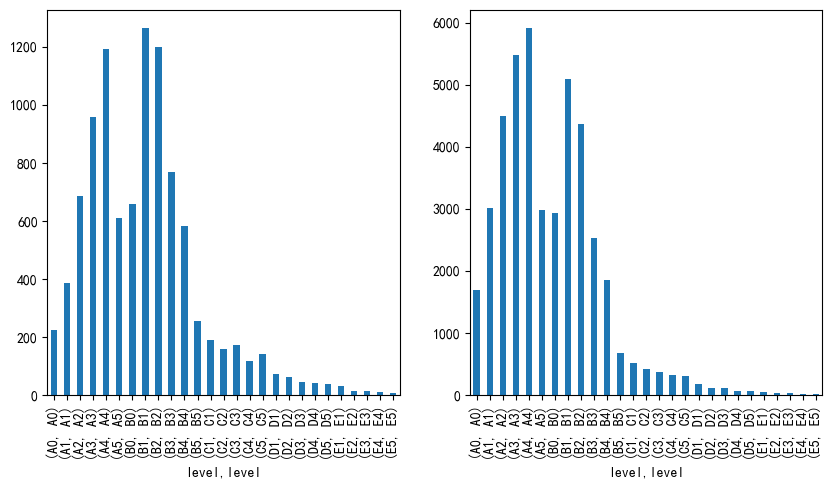

In [88]:
fig,axes=plt.subplots(1,2,figsize=(10, 5))

df_1_level = df[df['label'] == 1].groupby('level')['level'].value_counts()
df_1_level.plot(kind='bar',ax= axes[0])

df_0_level = df[df['label'] == 0].groupby('level')['level'].value_counts()
df_0_level.plot(kind='bar',ax= axes[1])


<AxesSubplot:xlabel='level,level'>

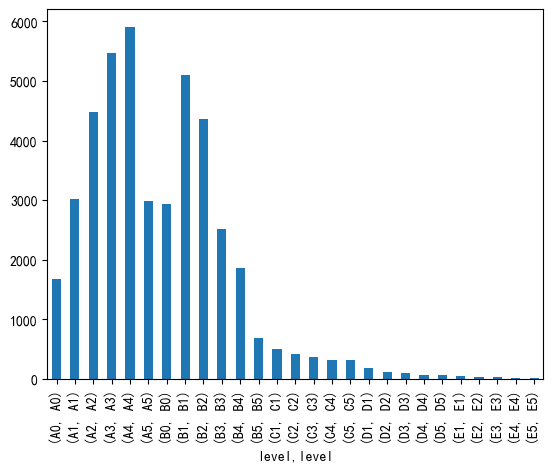

In [194]:
df_0_level = df[df['label'] == 0].groupby('level')['level'].value_counts()
df_0_level.plot(kind='bar')

In [13]:
print(df['level'].value_counts())
print(len(df['level'].value_counts()))

df['level_hash'] = df['level'].apply(lambda x : hash(x) % 1000 )
print(df['level_hash'].value_counts())
len(df['level_hash'].value_counts())

A4    7101
A3    6429
B1    6357
B2    5569
A2    5172
B0    3593
A5    3588
A1    3399
B3    3287
B4    2440
A0    1909
B5     935
C1     697
C2     581
C3     534
C5     453
C4     438
D1     246
D2     176
D3     148
D4     111
D5     106
E1      78
E2      45
E3      38
E5      28
E4      22
Name: level, dtype: int64
27
702    7101
987    6429
479    6357
360    5569
534    5172
472    3593
355    3588
103    3399
689    3287
40     2440
922    1909
980     935
178     697
4       581
57      534
488     453
827     438
863     246
842     176
446     148
744     111
25      106
651      78
494      45
279      38
718      28
34       22
Name: level_hash, dtype: int64


27

AttributeError: 'Rectangle' object has no property 'rug'

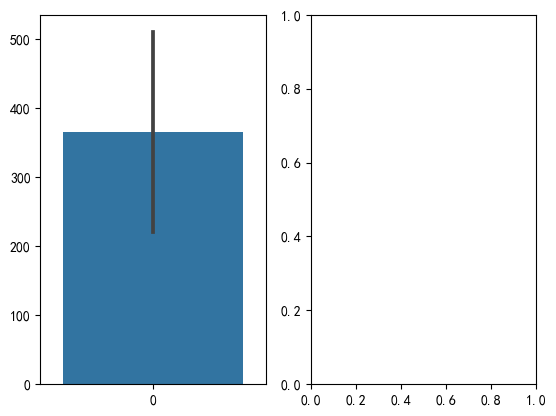

In [199]:
# fig,axes=plt.subplots(1,2)
# sns.barplot(df_1_level, ax=axes[0]) #左图
# sns.barplot(df_0_level, rug=True,ax=axes[1]) #右图

## loan,  banlance limit,  banlance

In [48]:
df = pd.read_csv('../../train/train.csv')
print(df.columns.values)
df[['loan','balance_limit','balance']].to_csv('loan_balance.csv')

['id' 'title' 'career' 'zip_code' 'residence' 'loan' 'term'
 'interest_rate' 'issue_time' 'syndicated' 'installment' 'record_time'
 'history_time' 'total_accounts' 'balance_accounts' 'balance_limit'
 'balance' 'level' 'label']


In [30]:
df_stat = pd.DataFrame()
df_stat['count'] = df['residence'].value_counts()
sumsum  = sum(df['residence'])

df_stat['ratio'] = df_stat['count']/sumsum

# df_stat['ratio2'] = df_stat['ratio'].apply(lambda x : ".4f%" % x)

df_stat

# df['residence'].plot(kind='bar')

,count,ratio
1,33738,0.744177
0,14094,0.310879
2,5498,0.121272
5,54,0.001191
3,52,0.001147
4,44,0.000971


In [32]:
df[['loan','balance_limit', 'balance']].describe()

,loan,balance_limit,balance
count,53480.000000,5.335000e+04,53480.000000
mean,11573.503179,1.640004e+04,7686.005682
std,6208.783075,5.607983e+04,10014.023760
min,1000.000000,1.020000e+02,0.000000
25%,8000.000000,1.990000e+03,1314.912500
50%,10000.000000,5.552500e+03,3004.355000
75%,12000.000000,2.290000e+04,10593.500000
max,33050.000000,6.780700e+06,65264.000000


<AxesSubplot:ylabel='Frequency'>

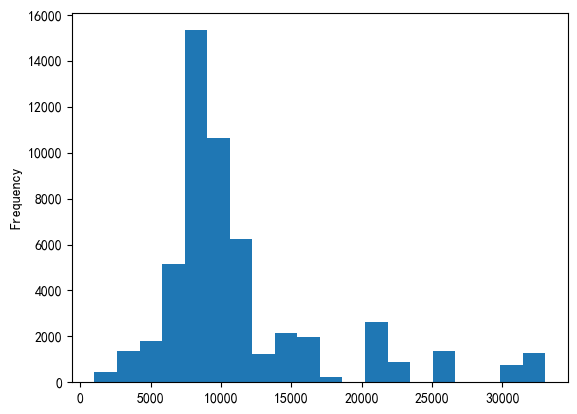

In [40]:
# fig,axes=plt.subplots(1,3)

# df['loan'].hist(bins=20)
df['loan'].plot(kind='hist',bins=20)

0        36200.0
1        20400.0
2        10800.0
3        24700.0
4         5100.0
          ...   
53475     3535.0
53476     1965.0
53477     7253.0
53478     2045.0
53479     3213.0
Name: balance_limit, Length: 53480, dtype: float64


<AxesSubplot:ylabel='Frequency'>

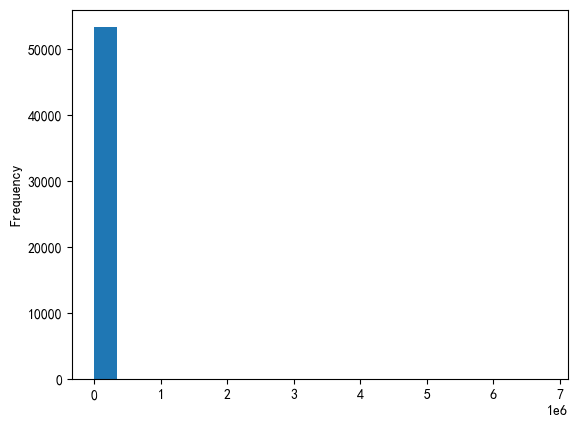

In [45]:
print(df['balance_limit'])
df['balance_limit'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

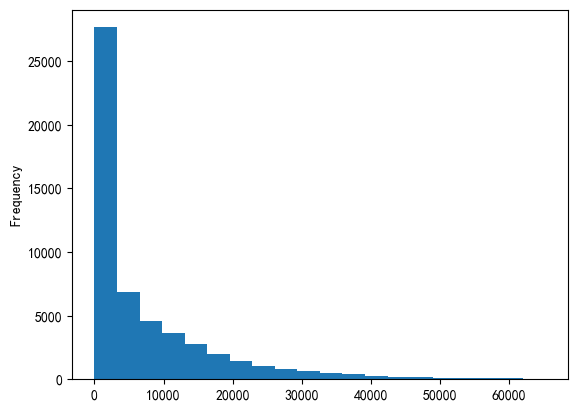

In [42]:
df['balance'].plot(kind='hist',bins=20)

## record time vs issue time

count    53480.000000
mean       -21.650598
std        507.195840
min      -1078.000000
25%       -373.000000
50%          0.000000
75%        179.000000
max       1800.000000
Name: record_issue_day_diff, dtype: float64


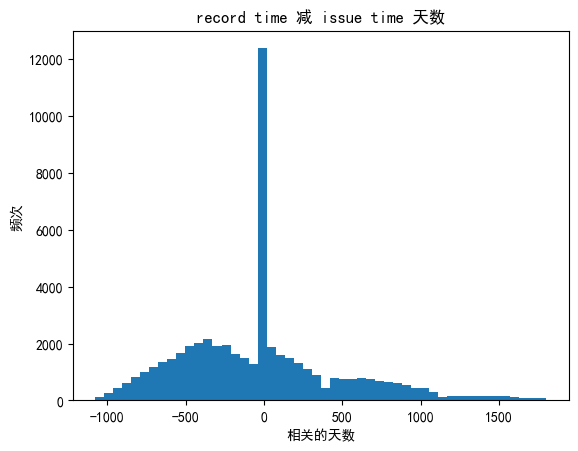

In [81]:
df ['record_issue_day_diff'] = (df['record_time'] - df['issue_time'])/60/60/24
df ['record_issue_day_diff'] = df['record_issue_day_diff'].map(int)
# help(df ['record_issue_day_diff'].hist)
# ax = df ['record_issue_day_diff'].hist(bins=20)
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
print(df ['record_issue_day_diff'].describe())
plt.hist(df['record_issue_day_diff'],bins=50)
plt.title('record time 减 issue time 天数')
plt.xlabel('相关的天数')
plt.ylabel('频次')
plt.show()

In [73]:
df_stat = df[['record_time', 'label']]
df_stat['record_time_format'] = df['record_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
print(df_stat)
rtm_bins = pd.cut(df_stat['record_time_format'], bins= 20)
df_stat_1 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 1]['label'].count())
df_stat_0 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 0]['label'].count())
print('record time label == 1 \n', df_stat_1)
print('record time label == 0 \n', df_stat_0)

       record_time  label  record_time_format
0       1238630622      0 2009-04-02 08:03:42
1       1161907665      1 2006-10-27 08:07:45
2       1383958593      0 2013-11-09 08:56:33
3       1214353935      0 2008-06-25 08:32:15
4       1240274527      1 2009-04-21 08:42:07
...            ...    ...                 ...
53475   1157587200      0 2006-09-07 08:00:00
53476   1138665600      0 2006-01-31 08:00:00
53477   1108771200      0 2005-02-19 08:00:00
53478   1159660800      0 2006-10-01 08:00:00
53479   1159401600      0 2006-09-28 08:00:00

[53480 rows x 3 columns]
record time label == 1 
 record_time_format
(1998-07-27 10:36:47.255000064, 1999-05-24 20:26:58.250000]       0
(1999-05-24 20:26:58.250000, 2000-03-15 08:26:45.500000]          4
(2000-03-15 08:26:45.500000, 2001-01-04 20:26:32.750000]          4
(2001-01-04 20:26:32.750000, 2001-10-27 08:26:20]                16
(2001-10-27 08:26:20, 2002-08-18 20:26:07.250000]                22
(2002-08-18 20:26:07.250000, 2003-06-1

d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
df_stat = df[['issue_time', 'label']]
df_stat['issue_time_format'] = df['issue_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
print(df_stat)
rtm_bins = pd.cut(df_stat['issue_time_format'], bins= 20)
df_stat_1 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 1]['label'].count())
df_stat_0 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 0]['label'].count())
print('issue time label == 1 \n', df_stat_1)
print('issue time label == 0 \n', df_stat_0)

       issue_time  label   issue_time_format
0      1238631967      0 2009-04-02 08:26:07
1      1128212052      1 2005-10-02 08:14:12
2      1249171509      0 2009-08-02 08:05:09
3      1172882234      0 2007-03-03 08:37:14
4      1172882384      1 2007-03-03 08:39:44
...           ...    ...                 ...
53475  1172880000      0 2007-03-03 08:00:00
53476  1160092800      0 2006-10-06 08:00:00
53477  1180310400      0 2007-05-28 08:00:00
53478  1176768000      0 2007-04-17 08:00:00
53479  1176163200      0 2007-04-10 08:00:00

[53480 rows x 3 columns]
issue time label == 1 
 issue_time_format
(1998-06-28 04:43:17.008999936, 1999-01-26 22:02:01.550000]       1
(1999-01-26 22:02:01.550000, 1999-08-23 11:14:31.100000]          2
(1999-08-23 11:14:31.100000, 2000-03-19 00:27:00.650000]          5
(2000-03-19 00:27:00.650000, 2000-10-13 13:39:30.200000]          3
(2000-10-13 13:39:30.200000, 2001-05-10 02:51:59.750000]         10
(2001-05-10 02:51:59.750000, 2001-12-04 16:04:29.300

d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
df_stat = df[['id', 'label']]
print(df_stat)
rtm_bins = pd.cut(df_stat['id'], bins= 20)
df_stat_1 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 1]['label'].count())
df_stat_0 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 0]['label'].count())
print('id label == 1 \n', df_stat_1)
print('id label == 0 \n', df_stat_0)

          id  label
0          0      0
1          1      1
2          2      0
3          3      0
4          4      1
...      ...    ...
53475  53475      0
53476  53476      0
53477  53477      0
53478  53478      0
53479  53479      0

[53480 rows x 2 columns]
id label == 1 
 id
(-53.479, 2673.95]     491
(2673.95, 5347.9]      511
(5347.9, 8021.85]      504
(8021.85, 10695.8]     493
(10695.8, 13369.75]    511
(13369.75, 16043.7]    507
(16043.7, 18717.65]    487
(18717.65, 21391.6]    495
(21391.6, 24065.55]    476
(24065.55, 26739.5]    554
(26739.5, 29413.45]    541
(29413.45, 32087.4]    537
(32087.4, 34761.35]    543
(34761.35, 37435.3]    556
(37435.3, 40109.25]    527
(40109.25, 42783.2]    541
(42783.2, 45457.15]    571
(45457.15, 48131.1]    433
(48131.1, 50805.05]    301
(50805.05, 53479.0]    309
dtype: int64
id label == 0 
 id
(-53.479, 2673.95]     2183
(2673.95, 5347.9]      2163
(5347.9, 8021.85]      2170
(8021.85, 10695.8]     2181
(10695.8, 13369.75]    2163
(13

In [21]:
df_stat = df[['interest_rate', 'label']]
# print(df_stat)
rtm_bins = pd.cut(df_stat['interest_rate'], bins= 20)
df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x['label'].value_counts()).reset_index()
df_stat.columns = ['interest_rate', 'label0','label1']
df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
df_stat['ratio'] = df_stat['label1'] / df_stat['cnt']
df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
df_stat
# df_stat_0 = df_stat.groupby(rtm_bins).apply( lambda x : x[x['label'] == 0]['label'].count())
# print('interest_rate label == 1 \n', df_stat_1)
# print('interest_rate label == 0 \n', df_stat_0)

# fig,axes=plt.subplots(1,2,figsize=(15, 5))

# df_stat_1.plot(kind = 'bar', ax=axes[0])
# df_stat_0.plot(kind = 'bar', ax=axes[1])

,interest_rate,label0,label1,cnt,ratio,cnt_ratio
0,"(5.224, 6.552]",2659,341,3000,0.113667,5.609574
1,"(6.552, 7.855]",3235,399,3634,0.109796,6.795064
2,"(7.855, 9.157]",3573,505,4078,0.123835,7.625280
3,"(9.157, 10.46]",3190,565,3755,0.150466,7.021316
4,"(10.46, 11.762]",3842,760,4602,0.165146,8.605086
5,"(11.762, 13.065]",3807,788,4595,0.171491,8.591997
6,"(13.065, 14.368]",3509,959,4468,0.214637,8.354525
7,"(14.368, 15.67]",2739,805,3544,0.227144,6.626776
8,"(15.67, 16.972]",2202,657,2859,0.229801,5.345924
9,"(16.972, 18.275]",2092,647,2739,0.236218,5.121541


In [173]:
def number_col_cut_stat(col_name):
    df_stat = df[[col_name, 'label']]
    # print(df_stat)
#     rtm_bins = pd.cut(df_stat[col_name], bins= 20)
    rtm_bins = pd.qcut(df_stat[col_name],  q=30, duplicates='drop')
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x[['label']].value_counts()).reset_index()
    df_stat.columns = [col_name, 'label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print('col_name \n',df_stat)
    
col_name = 'record_time'
col_cut_stat(col_name)

col_name 
                       record_time  label0  label1    cnt  label1_ratio  \
0   (901507007.255, 927548818.25]       0      12     12      1.000000   
1     (927548818.25, 953080005.5]       0      20     20      1.000000   
2     (927548818.25, 953080005.5]       1       4      5      0.800000   
3     (953080005.5, 978611192.75]       0      42     42      1.000000   
4     (953080005.5, 978611192.75]       1       4      5      0.800000   
5    (978611192.75, 1004142380.0]       0      96     96      1.000000   
6    (978611192.75, 1004142380.0]       1      16     17      0.941176   
7   (1004142380.0, 1029673567.25]       0     183    183      1.000000   
8   (1004142380.0, 1029673567.25]       1      22     23      0.956522   
9   (1029673567.25, 1055204754.5]       0     301    301      1.000000   
10  (1029673567.25, 1055204754.5]       1      46     47      0.978723   
11  (1055204754.5, 1080735941.75]       0     619    619      1.000000   
12  (1055204754.5, 10807359

In [25]:
def number_col_cut_stat(col_name):
    df_stat = df[[col_name, 'label']]
    # print(df_stat)
    rtm_bins = pd.cut(df_stat[col_name], bins= 20)
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name, 'label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print('col_name \n',df_stat)
    
col_name = 'interest_rate'
col_cut_stat(col_name)

col_name 
        interest_rate  label0  label1   cnt  label1_ratio  cnt_ratio
0     (5.224, 6.552]    2659     341  3000      0.113667   5.609574
1     (6.552, 7.855]    3235     399  3634      0.109796   6.795064
2     (7.855, 9.157]    3573     505  4078      0.123835   7.625280
3     (9.157, 10.46]    3190     565  3755      0.150466   7.021316
4    (10.46, 11.762]    3842     760  4602      0.165146   8.605086
5   (11.762, 13.065]    3807     788  4595      0.171491   8.591997
6   (13.065, 14.368]    3509     959  4468      0.214637   8.354525
7    (14.368, 15.67]    2739     805  3544      0.227144   6.626776
8    (15.67, 16.972]    2202     657  2859      0.229801   5.345924
9   (16.972, 18.275]    2092     647  2739      0.236218   5.121541
10  (18.275, 19.578]    1735     571  2306      0.247615   4.311892
11   (19.578, 20.88]    1511     435  1946      0.223535   3.638743
12   (20.88, 22.182]    1417     397  1814      0.218853   3.391922
13  (22.182, 23.485]    1307     334 

In [232]:
def number_col_cut_stat(col_name, bins_num =20):
    df_stat = df[[col_name, 'label']]
#     print('df_stat\n',df_stat)
    rtm_bins = pd.cut(df_stat[col_name], bins=  bins_num)
#     rtm_bins = pd.qcut(df_stat[col_name],  q=30, duplicates='drop')
#     print('bins \n', rtm_bins)
#     print(df_stat[[col_name, 'label']].groupby(rtm_bins)[['label']].apply(lambda x : (x[x['label']==1].count(),x[x['label']==0].count())))
#     print(df_stat[[col_name, 'label']].groupby(rtm_bins)[['label']].apply(lambda x : x.value_counts()))
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : pd.DataFrame(x['label'].value_counts()).T).reset_index()
#     print('df_stat\n',df_stat.groupby('level_1').apply(lambda x : x['label'].value_counts()))
    df_stat.columns = [col_name, 'level_1','label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    if 'level_1' in df_stat.columns :
         df_stat.drop('level_1',axis=1, inplace=True)
    print(col_name, '\n', df_stat)

col_name = 'loan'
number_col_cut_stat(col_name)

loan 
                   loan   label0  label1      cnt  label1_ratio  cnt_ratio
0     (967.95, 2602.5]    400.0    66.0    466.0      0.141631   0.871354
1     (2602.5, 4205.0]   1157.0   227.0   1384.0      0.164017   2.587883
2     (4205.0, 5807.5]   1500.0   317.0   1817.0      0.174463   3.397532
3     (5807.5, 7410.0]   4293.0   841.0   5134.0      0.163810   9.599850
4     (7410.0, 9012.5]  12557.0  2775.0  15332.0      0.180994  28.668661
5    (9012.5, 10615.0]   8720.0  1918.0  10638.0      0.180297  19.891548
6   (10615.0, 12217.5]   5075.0  1156.0   6231.0      0.185524  11.651085
7   (12217.5, 13820.0]   1012.0   232.0   1244.0      0.186495   2.326103
8   (13820.0, 15422.5]   1718.0   407.0   2125.0      0.191529   3.973448
9   (15422.5, 17025.0]   1527.0   436.0   1963.0      0.222109   3.670531
10  (17025.0, 18627.5]    196.0    46.0    242.0      0.190083   0.452506
11  (18627.5, 20230.0]      NaN     NaN      NaN           NaN        NaN
12  (20230.0, 21832.5]   2117.0

In [233]:
def number_col_cut_stat(col_name, bins_num =20):
    df_stat = df[[col_name, 'label']]
#     print('df_stat\n',df_stat)
#     rtm_bins = pd.cut(df_stat[col_name], bins=  bins_num)
    rtm_bins = pd.qcut(df_stat[col_name],  q=30, duplicates='drop')
#     print('bins \n', rtm_bins)
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : pd.DataFrame(x['label'].value_counts()).T).reset_index()
    df_stat.columns = [col_name, 'level_1','label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    if 'level_1' in df_stat.columns :
         df_stat.drop('level_1',axis=1, inplace=True)
    print(col_name, '\n', df_stat)

col_name = 'loan'
number_col_cut_stat(col_name)

loan 
                   loan  label0  label1   cnt  label1_ratio  cnt_ratio
0    (999.999, 4000.0]    1557     293  1850      0.158378   3.459237
1     (4000.0, 5300.0]    1500     317  1817      0.174463   3.397532
2     (5300.0, 7000.0]    3128     629  3757      0.167421   7.025056
3     (7000.0, 7600.0]    1427     255  1682      0.151605   3.145101
4     (7600.0, 8000.0]    4679    1077  5756      0.187109  10.762902
5     (8000.0, 9000.0]    7616    1655  9271      0.178514  17.335453
6    (9000.0, 10000.0]    6005    1280  7285      0.175704  13.621915
7   (10000.0, 10400.0]    2715     638  3353      0.190277   6.269634
8   (10400.0, 11000.0]    2540     544  3084      0.176394   5.766642
9   (11000.0, 11050.0]    1804     432  2236      0.193202   4.181002
10  (11050.0, 12000.0]     731     180   911      0.197585   1.703441
11  (12000.0, 15350.0]    2730     639  3369      0.189671   6.299551
12  (15350.0, 15950.0]     813     238  1051      0.226451   1.965221
13  (15950.0,

In [166]:
col_name = 'loan'

df_stat = df[['loan', 'term', 'label']]
df_stat['loan_term_avg'] = df_stat['loan'] / df_stat['term']
# rtm_bins = pd.cut(df_stat['loan_term_avg'],  bins=20)
rtm_bins = pd.qcut(df_stat['loan_term_avg'],  q=30, duplicates='drop')
df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x['label'].value_counts()).reset_index()
df_stat.columns = [col_name, 'label0','label1']
df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
print('loan term avg \n',df_stat)



loan term avg 
                    loan  label0  label1   cnt  label1_ratio  cnt_ratio
0     (29.999, 144.444]    2498     467  2965      0.157504   5.544129
1    (144.444, 165.278]    1297     244  1541      0.158339   2.881451
2    (165.278, 184.167]     841     418  1259      0.332010   2.354151
3      (184.167, 200.0]    1763     298  2061      0.144590   3.853777
4      (200.0, 247.222]    1018     254  1272      0.199686   2.378459
5      (247.222, 275.0]    1451     511  1962      0.260449   3.668661
6      (275.0, 288.889]    2351     448  2799      0.160057   5.233732
7    (288.889, 306.944]    1456     242  1698      0.142521   3.175019
8      (306.944, 355.0]     750     317  1067      0.297095   1.995138
9      (355.0, 416.667]    1058     245  1303      0.188028   2.436425
10   (416.667, 426.389]    1439     289  1728      0.167245   3.231114
11   (426.389, 486.111]    1411     335  1746      0.191867   3.264772
12   (486.111, 583.333]    2338     669  3007      0.222481  

d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [96]:
def number_col_cut_stat(col_name, bins_num =20):
    df_stat = df[[col_name, 'label']]
#     print('df_stat\n',df_stat.sort_values(by=col_name))
#     rtm_bins = pd.cut(df_stat[col_name], bins=  bins_num)
    rtm_bins = pd.qcut(df_stat[col_name], q=20)
#     print('group by \n', df_stat[[col_name, 'label']].groupby(rtm_bins).apply(lambda x : x['label'].value_counts()))
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x['label'].value_counts()).reset_index()
#     print('df_stat\n',df_stat)
    df_stat.columns = [col_name, 'label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(col_name,'\n',df_stat)

col_name = 'balance'
number_col_cut_stat(col_name)

balance 
                  balance  label0  label1   cnt  label1_ratio  cnt_ratio
0      (-0.001, 701.608]    2168     506  2674      0.189230   5.000000
1      (701.608, 796.56]    2792     631  3423      0.184341   6.400524
2       (796.56, 854.13]    1681     374  2055      0.181995   3.842558
3      (854.13, 941.072]    2082     462  2544      0.181604   4.756918
4    (941.072, 1314.912]    2157     517  2674      0.193343   5.000000
5   (1314.912, 1596.905]    2132     542  2674      0.202693   5.000000
6    (1596.905, 1753.95]    2142     545  2687      0.202828   5.024308
7     (1753.95, 2083.58]    2140     524  2664      0.196697   4.981301
8     (2083.58, 2512.31]    2135     537  2672      0.200973   4.996260
9    (2512.31, 3004.355]    2178     495  2673      0.185185   4.998130
10  (3004.355, 3798.009]    2256     418  2674      0.156320   5.000000
11    (3798.009, 5044.4]    2274     400  2674      0.149589   5.000000
12      (5044.4, 6680.0]    2214     462  2676      0.

In [93]:
def number_col_cut_stat(col_name, bins_num =20):
    df_stat = df[[col_name, 'label']].fillna(0)
#     df_stat.sort_values(by=col_name).to_csv('train_%s.csv' % col_name, mode='w', index=False)
#     print('is na : \n',df_stat[[col_name]].isna().sum()/ df_stat.shape[0])
#     print('describe \n',df_stat[[col_name]].describe())
    
#     rtm_bins = pd.cut(df_stat[col_name].sort_values(), bins = bins_num)
    rtm_bins = pd.qcut(df_stat[col_name].sort_values(), q=20)
#     print('bins \n', rtm_bins)
#     print('df_stat\n',df_stat)
#     print('value count \n',df_stat[[col_name, 'label']].groupby(rtm_bins).apply( lambda x : x['label'].value_counts()))
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name, 'label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(col_name,'\n',df_stat)

col_name = 'balance_limit'
number_col_cut_stat(col_name, 50)

balance_limit 
            balance_limit  label0  label1   cnt  label1_ratio  cnt_ratio
0        (-0.001, 992.0]    2166     512  2678      0.191187   5.007479
1        (992.0, 1206.0]    2199     497  2696      0.184347   5.041137
2       (1206.0, 1408.0]    2174     475  2649      0.179313   4.953254
3       (1408.0, 1638.0]    2201     477  2678      0.178118   5.007479
4      (1638.0, 1973.25]    2130     539  2669      0.201948   4.990651
5      (1973.25, 2465.0]    2177     501  2678      0.187080   5.007479
6      (2465.0, 2924.65]    2116     554  2670      0.207491   4.992521
7      (2924.65, 3428.2]    2123     551  2674      0.206058   5.000000
8       (3428.2, 4296.0]    2168     513  2681      0.191347   5.013089
9       (4296.0, 5500.0]    2196     477  2673      0.178451   4.998130
10      (5500.0, 8100.0]    2298     430  2728      0.157625   5.100972
11     (8100.0, 11707.2]    2153     461  2614      0.176358   4.887809
12    (11707.2, 15200.0]    2140     538  2678  

In [215]:
def number_col_cut_stat(col_name, bins_num =20):
    df_stat = df[[col_name, 'label']].fillna(0)
#     df_stat.sort_values(by=col_name).to_csv('train_%s.csv' % col_name, mode='w', index=False)
#     print('is na : \n',df_stat[[col_name]].isna().sum()/ df_stat.shape[0])
#     print('describe \n',df_stat[[col_name]].describe())
    
    rtm_bins = pd.cut(df_stat[col_name].sort_values(), bins = bins_num)
#     rtm_bins = pd.qcut(df_stat[col_name].sort_values(), q=20)
#     print('bins \n', rtm_bins)
#     print('df_stat\n',df_stat)
#     print('value count \n',df_stat[[col_name, 'label']].groupby(rtm_bins).apply( lambda x : x['label'].value_counts()))
    df_stat = df_stat.groupby(rtm_bins).apply( lambda x : pd.DataFrame(x['label'].value_counts()).T).reset_index()
    df_stat = df_stat.drop('level_1',axis =1)
    df_stat.columns = [col_name, 'label0','label1']
    df_stat['cnt'] = df_stat['label1']  + df_stat['label0']
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(col_name,'\n',df_stat)

col_name = 'balance_limit'
number_col_cut_stat(col_name, 100)

balance_limit 
              balance_limit   label0  label1      cnt  label1_ratio  cnt_ratio
0       (-6780.7, 67807.0]  42231.0  9683.0  51914.0      0.186520  97.140826
1      (67807.0, 135614.0]   1233.0   193.0   1426.0      0.135344   2.668313
2     (135614.0, 203421.0]     74.0     7.0     81.0      0.086420   0.151566
3     (203421.0, 271228.0]     17.0     4.0     21.0      0.190476   0.039295
4     (271228.0, 339035.0]      5.0     NaN      NaN           NaN        NaN
..                     ...      ...     ...      ...           ...        ...
95  (6441665.0, 6509472.0]      NaN     NaN      NaN           NaN        NaN
96  (6509472.0, 6577279.0]      NaN     NaN      NaN           NaN        NaN
97  (6577279.0, 6645086.0]      NaN     NaN      NaN           NaN        NaN
98  (6645086.0, 6712893.0]      NaN     NaN      NaN           NaN        NaN
99  (6712893.0, 6780700.0]      1.0     NaN      NaN           NaN        NaN

[100 rows x 6 columns]


In [162]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(df_stat)
    
col_name='term'
cate_stat(col_name)

   term  label0  label1    cnt  label1_ratio  cnt_ratio
0    12   22632    5064  27696      0.182842  51.787584
1    36   16936    2959  19895      0.148731  37.200823
2    60    4024    1865   5889      0.316692  11.011593


In [174]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(df_stat)
    
col_name='career'
cate_stat(col_name)

    career  label0  label1    cnt  label1_ratio  cnt_ratio
0      0.0    3127     732   3859      0.189686   7.585705
1      1.0    2773     649   3422      0.189655   6.726687
2      2.0    3304     761   4065      0.187208   7.990643
3      3.0    3194     697   3891      0.179131   7.648608
4      4.0    2769     634   3403      0.186306   6.689338
5      5.0    2759     647   3406      0.189959   6.695235
6      6.0    2369     533   2902      0.183666   5.704513
7      7.0    2385     524   2909      0.180131   5.718273
8      8.0    2429     551   2980      0.184899   5.857839
9      9.0    2225     491   2716      0.180781   5.338890
10    10.0   14226    3093  17319      0.178590  34.044268


In [178]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(col_name, '\n', df_stat)
    
col_name='title'
cate_stat(col_name)

title 
     title  label0  label1    cnt  label1_ratio  cnt_ratio
0       0   16803    3640  20443      0.178056  38.225505
1       1    2424     534   2958      0.180527   5.531040
2       2    3231     823   4054      0.203009   7.580404
3       3      21      12     33      0.363636   0.061705
4       4     153      55    208      0.264423   0.388930
5       5     111      28    139      0.201439   0.259910
6       6    2736     738   3474      0.212435   6.495886
7       7    3507     828   4335      0.191003   8.105834
8       8    4477    1070   5547      0.192897  10.372102
9       9    4475    1014   5489      0.184733  10.263650
10     10    5654    1146   6800      0.168529  12.715034


In [ ]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(col_name, '\n', df_stat)
    
col_name='install'
cate_stat(col_name)

In [182]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(df_stat)
    
col_name='level'
cate_stat(col_name)

   level  label0  label1   cnt  label1_ratio  cnt_ratio
0     A0       0    1684  1684      1.000000   3.147252
1     A0       1     225   226      0.995575   0.422375
2     A1       0    3014  3014      1.000000   5.632908
3     A1       1     385   386      0.997409   0.721401
4     A2       0    4486  4486      1.000000   8.383950
5     A2       1     686   687      0.998544   1.283944
6     A3       0    5471  5471      1.000000  10.224830
7     A3       1     958   959      0.998957   1.792289
8     A4       0    5909  5909      1.000000  11.043415
9     A4       1    1192  1193      0.999162   2.229615
10    A5       0    2978  2978      1.000000   5.565627
11    A5       1     610   611      0.998363   1.141907
12    B0       0    2935  2935      1.000000   5.485264
13    B0       1     658   659      0.998483   1.231615
14    B1       0    5093  5093      1.000000   9.518381
15    B1       1    1264  1265      0.999209   2.364177
16    B2       0    4369  4369      1.000000   8

In [187]:
col_name='grade'

df_stat = df[['level', 'label']]
df_stat['grade'] = df_stat['level'].apply( lambda x : str(x)[0])
df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
df_stat.columns = [col_name ,'label0', 'label1']
df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
print(df_stat)


  grade  label0  label1    cnt  label1_ratio  cnt_ratio
0     A   23542    4056  27598      0.146967  51.604338
1     B   17455    4726  22181      0.213065  41.475318
2     C    1927     776   2703      0.287088   5.054226
3     D     531     256    787      0.325286   1.471578
4     E     137      74    211      0.350711   0.394540


d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [190]:
col_name='subgrade'

df_stat = df[['level', 'label']]
df_stat['subgrade'] = df_stat['level'].apply( lambda x : str(x)[1])
df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
df_stat.columns = [col_name ,'label0', 'label1']
df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
print(df_stat)


  subgrade  label0  label1    cnt  label1_ratio  cnt_ratio
0        0    4619     883   5502      0.160487  10.287958
1        1    8837    1940  10777      0.180013  20.151458
2        2    9428    2115  11543      0.183228  21.583770
3        3    8482    1954  10436      0.187236  19.513837
4        4    8170    1942  10112      0.192049  18.908003
5        5    4056    1054   5110      0.206262   9.554974


d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [209]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : pd.DataFrame(x['label'].value_counts()).T).reset_index()
    df_stat = df_stat.drop('level_1', axis=1)
    df_stat.columns = [col_name, 'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(df_stat)
col_name='level'
cate_stat(col_name)

   level  label0  label1   cnt  label1_ratio  cnt_ratio
0     A0    1684     225  1909      0.117863   3.569559
1     A1    3014     385  3399      0.113269   6.355647
2     A2    4486     686  5172      0.132637   9.670905
3     A3    5471     958  6429      0.149012  12.021316
4     A4    5909    1192  7101      0.167864  13.277861
5     A5    2978     610  3588      0.170011   6.709050
6     B0    2935     658  3593      0.183134   6.718399
7     B1    5093    1264  6357      0.198836  11.886687
8     B2    4369    1200  5569      0.215479  10.413239
9     B3    2520     767  3287      0.233343   6.146223
10    B4    1858     582  2440      0.238525   4.562453
11    B5     680     255   935      0.272727   1.748317
12    C1     509     188   697      0.269727   1.303291
13    C2     424     157   581      0.270224   1.086387
14    C3     361     173   534      0.323970   0.998504
15    C4     322     116   438      0.264840   0.818998
16    C5     311     142   453      0.313466   0

In [180]:
def cate_stat(col_name):
    df_stat = df[[col_name, 'label']]
    df_stat = df_stat.groupby(col_name).apply( lambda x : x['label'].value_counts()).reset_index()
    df_stat.columns = [col_name ,'label0', 'label1']
    df_stat['cnt'] = df_stat[['label0','label1']].sum(axis=1)
    df_stat['label1_ratio'] = df_stat['label1'] / df_stat['cnt']
    df_stat['cnt_ratio'] = (df_stat['cnt'] / df_stat['cnt'].sum())*100
    print(df_stat)
    
col_name='installment'
cate_stat(col_name)

   installment  label0  label1    cnt  label1_ratio  cnt_ratio
0            0   37463    8438  45901      0.183830  85.828347
1            1    6129    1450   7579      0.191318  14.171653


In [50]:
df['syndicated'].value_counts()

0    52992
1      488
Name: syndicated, dtype: int64

In [56]:
df_stat = pd.DataFrame()
df_stat['cnt'] = df['title'].value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

df_stat

,cnt,ratio
0,20443,0.382255
10,6800,0.127150
8,5547,0.103721
9,5489,0.102636
7,4335,0.081058
2,4054,0.075804
6,3474,0.064959
1,2958,0.055310
4,208,0.003889
5,139,0.002599


In [60]:
df_stat = pd.DataFrame()
df_stat['cnt'] = df['career'].value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------career 分布占比---------- ')
df_stat

------------career 分布占比---------- 


,cnt,ratio
10.0,17319,0.340443
2.0,4065,0.079906
3.0,3891,0.076486
0.0,3859,0.075857
1.0,3422,0.067267
5.0,3406,0.066952
4.0,3403,0.066893
8.0,2980,0.058578
7.0,2909,0.057183
6.0,2902,0.057045


In [14]:
df_stat = pd.DataFrame()
df_stat['cnt'] = df['label'].value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------career 分布占比---------- ')
df_stat

------------career 分布占比---------- 


,cnt,ratio
0,43592,0.815108
1,9888,0.184892


In [84]:
df_stat = pd.DataFrame()
df_stat['cnt'] = df['installment'].value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------installment 分布占比---------- ')
df_stat

------------installment 分布占比---------- 


,cnt,ratio
0,45901,0.858283
1,7579,0.141717


In [87]:
#  分期付款期限 

col_name = 'term'
df_stat = pd.DataFrame()
df_stat['cnt'] = df[col_name].value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------%s 分布占比---------- ' % col_name )
df_stat

------------term 分布占比---------- 


,cnt,ratio
12,27696,0.517876
36,19895,0.372008
60,5889,0.110116


In [94]:
col_name = 'zip_code'
df_stat = pd.DataFrame()
df_stat['cnt'] = df[col_name].apply(lambda x : str(x)[:2]).value_counts()
sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------%s 分布占比---------- ' % col_name )
df_stat

------------zip_code 分布占比---------- 


,cnt,ratio
60,27696,0.517876
18,3953,0.073915
23,2148,0.040165
24,2143,0.040071
31,1830,0.034218
12,1002,0.018736
40,941,0.017595
13,826,0.015445
10,823,0.015389
29,821,0.015352


In [394]:
df_zip = df[['zip_code','label']]
df_zip['zip_province']  = df_zip['zip_code'].apply( lambda x : str(x)[:2])
df_zip_stat = df_zip.groupby('zip_province')[['label']].apply(lambda x : x.value_counts()).reset_index()
df_zip_stat.columns = ['zip_province', 'label0', 'label1']
df_zip_stat['ratio'] = df_zip_stat['label1'] / (df_zip_stat['label1'] + df_zip_stat['label0'])
df_zip_stat
# .apply( lambda x :  x['label0']/x['label1'])
# pd.set_option('display.max_columns',50)
# df_zip_stat = df_zip.groupby(pd.cut(df['zip_code'], bins=20))[['label']].apply( lambda x : x.value_counts())
# df_zip_stat['sum'] = df_zip_stat.sum(axis=1).values
# df_zip_stat = df_zip_stat.reset_index()
# df_zip_stat.rename(columns={0: 'label0'})
# df_zip_stat.columns = ['zip_code', 'label0', 'label1', 'cnt']
# df_zip_stat['ratio'] = df_zip_stat['label1'] / df_zip_stat['cnt']
# df_zip_stat
# df_zip_stat[['1','sum']]
# df_zip_stat.apply(lambda x  : x)

d:\users\chenchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_province,label0,label1,ratio
0,10,650,173,0.210207
1,11,46,9,0.163636
2,12,825,177,0.176647
3,13,684,142,0.171913
4,14,321,90,0.218978
5,15,245,46,0.158076
6,16,93,12,0.114286
7,17,650,141,0.178255
8,18,3225,728,0.184164
9,19,591,148,0.200271


In [ ]:
col_name = 'zip_code'
df_zip = pd.DataFrame()
df_zip['']  = df[col_name].apply(lambda x : str(x)[:2])

# df_stat['cnt'] = df[col_name].apply(lambda x : str(x)[:2]).value_counts()

sumsum = sum(df_stat['cnt'])
df_stat['ratio'] = df_stat['cnt']/sumsum

print('------------%s 分布占比---------- ' % col_name )
df_stat

<AxesSubplot:>

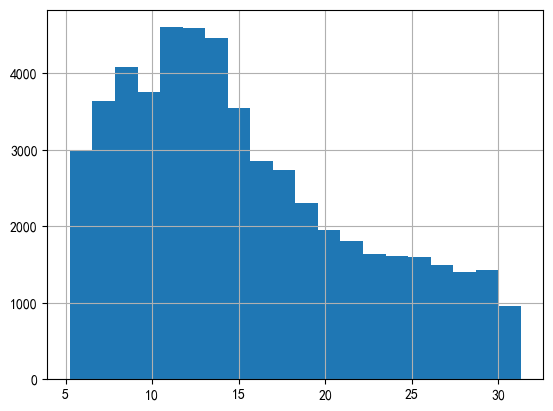

In [96]:
df['interest_rate'].hist(bins=20)

In [109]:
interest_rate_labels = ['interest_rate_%d' % i for i in range(20)]
print(interest_rate_labels)
pd.cut(df['interest_rate'], bins=20, labels = interest_rate_labels)

['interest_rate_0', 'interest_rate_1', 'interest_rate_2', 'interest_rate_3', 'interest_rate_4', 'interest_rate_5', 'interest_rate_6', 'interest_rate_7', 'interest_rate_8', 'interest_rate_9', 'interest_rate_10', 'interest_rate_11', 'interest_rate_12', 'interest_rate_13', 'interest_rate_14', 'interest_rate_15', 'interest_rate_16', 'interest_rate_17', 'interest_rate_18', 'interest_rate_19']


0         interest_rate_4
1         interest_rate_5
2        interest_rate_12
3         interest_rate_8
4         interest_rate_6
               ...       
53475    interest_rate_14
53476    interest_rate_19
53477     interest_rate_3
53478    interest_rate_14
53479     interest_rate_9
Name: interest_rate, Length: 53480, dtype: category
Categories (20, object): ['interest_rate_0' < 'interest_rate_1' < 'interest_rate_2' < 'interest_rate_3' ... 'interest_rate_16' < 'interest_rate_17' < 'interest_rate_18' < 'interest_rate_19']

# term 与 label

In [119]:
df = pd.read_csv('../../train.csv')
df[['term', 'label']].groupby('term')['label'].apply(lambda x :  x.value_counts()/x.count())

term   
12    0    0.817158
      1    0.182842
36    0    0.851269
      1    0.148731
60    0    0.683308
      1    0.316692
Name: label, dtype: float64

# 时间特征

# 交易数据

In [64]:
df = pd.read_csv('../../train.csv')
df['issue_time_format'] = df['issue_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['record_time_format'] = df['record_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['history_time_format'] = df['history_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df

,id,title,career,zip_code,residence,loan,term,interest_rate,issue_time,syndicated,...,history_time,total_accounts,balance_accounts,balance_limit,balance,level,label,issue_time_format,record_time_format,history_time_format
0,0,9,0.0,221373,1,7200,36,10.95,1238631967,0,...,472006661,17.0,9.0,36200.0,13856.00,A4,0,2009-04-02 08:26:07,2009-04-02 08:03:42,1984-12-16 08:57:41
1,1,8,10.0,311681,0,21300,36,12.95,1128212052,0,...,763779041,17.0,9.0,20400.0,13773.00,B0,1,2005-10-02 08:14:12,2006-10-27 08:07:45,1994-03-16 08:50:41
2,2,8,7.0,271562,1,10400,60,21.05,1249171509,0,...,727143443,17.0,9.0,10800.0,2023.00,B4,0,2009-08-02 08:05:09,2013-11-09 08:56:33,1993-01-16 08:17:23
3,3,7,2.0,522083,0,33050,36,16.40,1172882234,0,...,687660346,17.0,9.0,24700.0,21992.00,B3,0,2007-03-03 08:37:14,2008-06-25 08:32:15,1991-10-17 08:45:46
4,4,8,3.0,101026,1,5200,36,14.35,1172882384,0,...,322012875,17.0,9.0,5100.0,1669.00,B2,1,2007-03-03 08:39:44,2009-04-21 08:42:07,1980-03-16 08:01:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53475,53475,2,2.0,603000,1,9000,12,23.55,1172880000,0,...,1061769600,12.0,5.0,3535.0,2595.73,A4,0,2007-03-03 08:00:00,2006-09-07 08:00:00,2003-08-25 08:00:00
53476,53476,0,10.0,601702,1,8000,12,30.70,1160092800,0,...,1038268800,5.0,2.0,1965.0,1433.34,B2,0,2006-10-06 08:00:00,2006-01-31 08:00:00,2002-11-26 08:00:00
53477,53477,2,10.0,602808,1,10000,12,9.40,1180310400,0,...,1087603200,12.0,5.0,7253.0,3813.79,B2,0,2007-05-28 08:00:00,2005-02-19 08:00:00,2004-06-19 08:00:00
53478,53478,0,10.0,602102,2,9000,12,24.40,1176768000,0,...,1071792000,3.0,3.0,2045.0,1006.40,A2,0,2007-04-17 08:00:00,2006-10-01 08:00:00,2003-12-19 08:00:00


In [65]:
df_bank = pd.read_csv('../../train/train_bank_statement.csv')
df_bank

,id,time,direction,amount
0,0,1224115200,0,8771.350000
1,0,1224288000,1,310.650000
2,0,1224460800,1,152.620000
3,0,1225152000,1,20.490000
4,0,1226793600,1,173.170000
...,...,...,...,...
1717413,50371,1159747200,1,133.818723
1717414,50371,1160179200,1,71.777279
1717415,50371,1160956800,0,46.981217
1717416,50371,1161129600,1,160.510592


In [77]:
df_bank['time_format'] = df_bank['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

df_tx_stat = df_bank.groupby('id')['time_format'].agg(['max','min','count'])
df_concat = pd.concat([df, df_tx_stat],  axis=1)

df_concat.columns
df_concat.rename(columns = {'max': 'tx_time_max', 'min': 'tx_time_min', 'count':'tx_count' }, inplace=True)
# df_concat.to_csv('train_concat_tx_time.csv')

print(df_concat.columns)
df_concat['record_tx_max_days'] = df_concat['record_time_format'] - df_concat['tx_time_max']
df_concat['record_tx_max_days'] = df_concat['record_tx_max_days'].map(lambda x : x.days)

df_concat['record_issue_days'] = df_concat['record_time_format'] - df_concat['issue_time_format']
df_concat['record_issue_days'] = df_concat['record_issue_days'].map(lambda x : x.days)

df_concat['record_history_days'] = df_concat['record_time_format'] - df_concat['history_time_format']
df_concat['record_history_days'] = df_concat['record_history_days'].map(lambda x : x.days)

df_concat['issue_history_days'] = df_concat['issue_time_format'] - df_concat['history_time_format']
df_concat['issue_history_days'] = df_concat['issue_history_days'].map(lambda x : x.days)

Index(['id', 'title', 'career', 'zip_code', 'residence', 'loan', 'term',
       'interest_rate', 'issue_time', 'syndicated', 'installment',
       'record_time', 'history_time', 'total_accounts', 'balance_accounts',
       'balance_limit', 'balance', 'level', 'label', 'issue_time_format',
       'record_time_format', 'history_time_format', 'tx_time_max',
       'tx_time_min', 'tx_count'],
      dtype='object')


In [80]:
df_concat[['record_time_format' , 'issue_time_format', 'history_time_format' ,'tx_time_max', 'tx_time_min', 'record_tx_max_days']]
df_concat[['record_time_format' , 'issue_time_format','record_issue_days', 'history_time_format' ,'record_history_days','tx_time_max', 'tx_time_min', 'record_tx_max_days']].to_csv('train_time.csv',mode='w')

<AxesSubplot:>

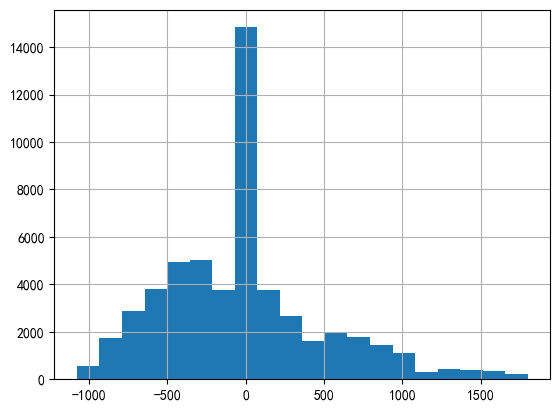

In [82]:
df_concat['record_issue_days'].hist(bins=20)

In [138]:
df_bank = pd.read_csv('./train/train_bank_statement.csv')
df_bank['time_format'] = df_bank['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# df_tx_stat = df_bank.groupby('id')['time_format'].agg(['max','min','count'])
tx_dict = {key: group for key, group in df_bank.groupby('id')}
tx_dict

{0:     id        time  direction    amount         time_format
 0    0  1224115200          0   8771.35 2008-10-16 08:00:00
 1    0  1224288000          1    310.65 2008-10-18 08:00:00
 2    0  1224460800          1    152.62 2008-10-20 08:00:00
 3    0  1225152000          1     20.49 2008-10-28 08:00:00
 4    0  1226793600          1    173.17 2008-11-16 08:00:00
 5    0  1226793600          0  10638.10 2008-11-16 08:00:00
 6    0  1226966400          1    282.60 2008-11-18 08:00:00
 7    0  1227139200          1    167.55 2008-11-20 08:00:00
 8    0  1227225600          1    253.57 2008-11-21 08:00:00
 9    0  1227312000          1    616.38 2008-11-22 08:00:00
 10   0  1227398400          1   1301.06 2008-11-23 08:00:00
 11   0  1227571200          1    366.02 2008-11-25 08:00:00
 12   0  1227744000          1      2.01 2008-11-27 08:00:00
 13   0  1227830400          1   1127.31 2008-11-28 08:00:00
 14   0  1228003200          1    276.68 2008-11-30 08:00:00
 15   0  1228176000  

In [91]:
!ls ../202508261937

202508261937_gh_v1.csv
202508261937_gh_v2.csv
model_stacking_v5.0.ipynb
model_stacking_v5.ipynb
process_v5.ipynb
test.dat.202508261937
train.dat.202508261937


label
(-0.001, 0.05]       2
(0.05, 0.1]         14
(0.1, 0.15]         52
(0.15, 0.2]        113
(0.2, 0.25]        253
(0.25, 0.3]        347
(0.3, 0.35]        455
(0.35, 0.4]        657
(0.4, 0.45]       1234
(0.45, 0.5]       1365
(0.5, 0.55]       1421
(0.55, 0.6]       5765
(0.6, 0.65]       5222
(0.65, 0.7]       1117
(0.7, 0.75]        761
(0.75, 0.8]        462
(0.8, 0.85]        396
(0.85, 0.9]        289
(0.9, 0.95]        115
(0.95, 1.0]         14
Name: label, dtype: int64


<AxesSubplot:xlabel='label'>

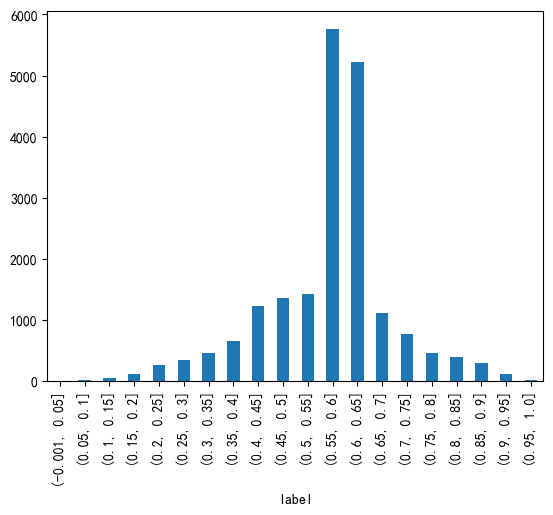

In [92]:
ret = pd.read_csv('../v7/v7_gh_v1.csv')
df_ret = ret.groupby(pd.cut(ret['label'],bins=20))['label'].agg('count')
print(df_ret)
df_ret.plot(kind='bar')


label
(-0.001, 0.05]     726
(0.05, 0.1]       2379
(0.1, 0.15]       2239
(0.15, 0.2]       4717
(0.2, 0.25]       6062
(0.25, 0.3]       1362
(0.3, 0.35]        765
(0.35, 0.4]        460
(0.4, 0.45]        283
(0.45, 0.5]        258
(0.5, 0.55]        245
(0.55, 0.6]        203
(0.6, 0.65]        158
(0.65, 0.7]         92
(0.7, 0.75]         53
(0.75, 0.8]         29
(0.8, 0.85]         11
(0.85, 0.9]          8
(0.9, 0.95]          3
(0.95, 1.0]          1
Name: label, dtype: int64


<AxesSubplot:xlabel='label'>

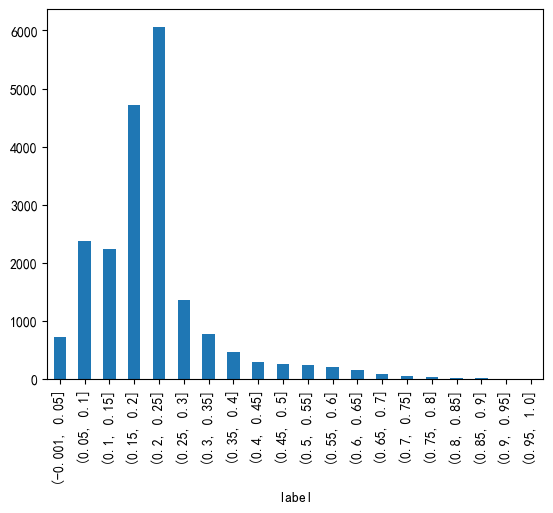

In [93]:
ret = pd.read_csv('../202508261937/202508261937_gh_v2.csv')
df_ret = ret.groupby(pd.cut(ret['label'],bins=20))['label'].agg('count')
print(df_ret)
df_ret.plot(kind='bar')

label
(-0.001, 0.05]    1831
(0.05, 0.1]       6476
(0.1, 0.15]       1249
(0.15, 0.2]        561
(0.2, 0.25]        606
(0.25, 0.3]        686
(0.3, 0.35]        700
(0.35, 0.4]        767
(0.4, 0.45]        796
(0.45, 0.5]        895
(0.5, 0.55]        801
(0.55, 0.6]        803
(0.6, 0.65]        810
(0.65, 0.7]        752
(0.7, 0.75]        744
(0.75, 0.8]        679
(0.8, 0.85]        556
(0.85, 0.9]        235
(0.9, 0.95]         93
(0.95, 1.0]         14
Name: label, dtype: int64


<AxesSubplot:xlabel='label'>

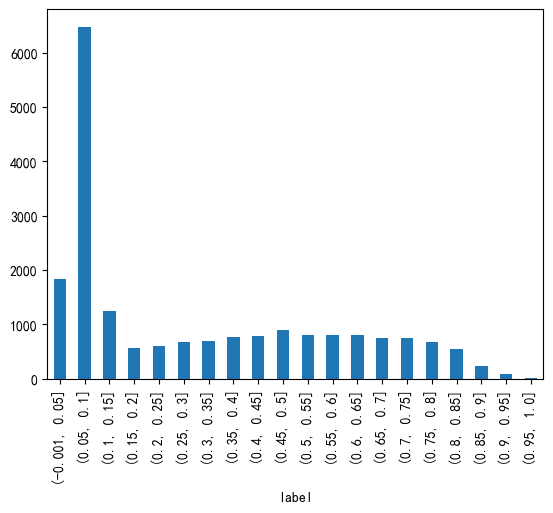

In [94]:
ret = pd.read_csv('../202508261937/202508261937_gh_v1.csv')
df_ret = ret.groupby(pd.cut(ret['label'],bins=20))['label'].agg('count')
print(df_ret)
df_ret.plot(kind='bar')

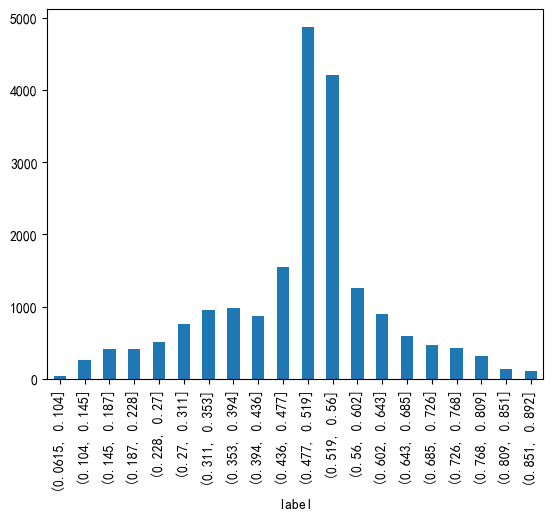

In [102]:
def stat_file_result(file_input):
    ret = pd.read_csv(file_input)
    df_ret = ret.groupby(pd.cut(ret['label'],bins=20))['label'].agg('count')
#     print(df_ret)
    df_ret.plot(kind='bar')
    
stat_file_result('../../0825_lgb_base_cv_v0.2.csv')

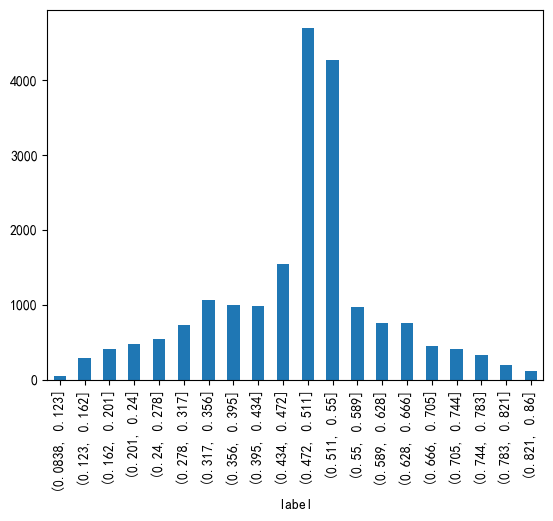

In [103]:
stat_file_result('../../0825_lgb_base_cv_v0.3.csv')

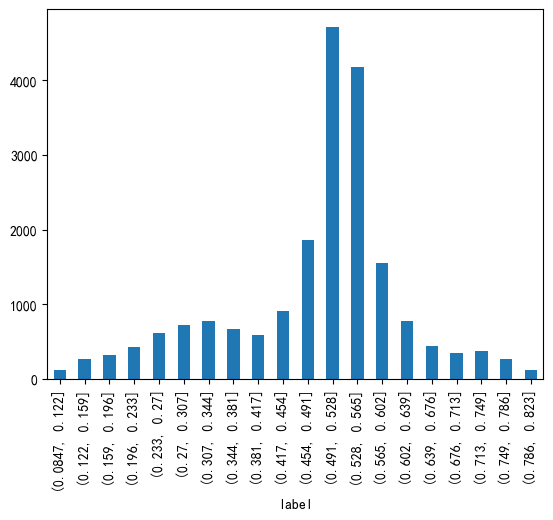

In [104]:
stat_file_result('../../0825_lgb_base_cv_v0.1.csv')

# 相关系数计算

In [126]:
df

,id,title,career,zip_code,residence,loan,term,interest_rate,issue_time,syndicated,installment,record_time,history_time,total_accounts,balance_accounts,balance_limit,balance,level,label
0,0,9,0.0,221373,1,7200,36,10.95,1238631967,0,1,1238630622,472006661,17.0,9.0,36200.0,13856.00,A4,0
1,1,8,10.0,311681,0,21300,36,12.95,1128212052,0,0,1161907665,763779041,17.0,9.0,20400.0,13773.00,B0,1
2,2,8,7.0,271562,1,10400,60,21.05,1249171509,0,0,1383958593,727143443,17.0,9.0,10800.0,2023.00,B4,0
3,3,7,2.0,522083,0,33050,36,16.40,1172882234,0,1,1214353935,687660346,17.0,9.0,24700.0,21992.00,B3,0
4,4,8,3.0,101026,1,5200,36,14.35,1172882384,0,0,1240274527,322012875,17.0,9.0,5100.0,1669.00,B2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53475,53475,2,2.0,603000,1,9000,12,23.55,1172880000,0,0,1157587200,1061769600,12.0,5.0,3535.0,2595.73,A4,0
53476,53476,0,10.0,601702,1,8000,12,30.70,1160092800,0,0,1138665600,1038268800,5.0,2.0,1965.0,1433.34,B2,0
53477,53477,2,10.0,602808,1,10000,12,9.40,1180310400,0,0,1108771200,1087603200,12.0,5.0,7253.0,3813.79,B2,0
53478,53478,0,10.0,602102,2,9000,12,24.40,1176768000,0,0,1159660800,1071792000,3.0,3.0,2045.0,1006.40,A2,0


In [5]:
from sklearn.metrics import mutual_info_score

df = df0.copy()
col_arr = ['label','term', 'loan','balance','title','career','interest_rate','installment','record_time', 'history_time' ,'issue_time']
df_corr = df[col_arr].corr(method='spearman')
df_corr.sort_values(by='label',ascending=False)

# for col_nm in col_arr:
#     print(col_nm, mutual_info_score(df['label'], df[col_nm]))

ret = [[col_nm, df['label'].corr(df[col_nm], method='spearman')] for col_nm in col_arr ]
pd.DataFrame(ret).sort_values(by=1, ascending=False)

,0,1
0,label,1.000000
6,interest_rate,0.091116
8,record_time,0.055260
1,term,0.039411
2,loan,0.034830
10,issue_time,0.032229
9,history_time,0.008952
7,installment,0.006727
4,title,0.002097
3,balance,-0.007907
